In [104]:
import os

import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Dataset

In [105]:
pillow_image = Image.open(
    "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
image_array = np.array(pillow_image)
print(image_array.shape)

(1152, 1422)


In [106]:
SAVE_DIR = "/Users/Bilal/PycharmProjects/LearningAI/models/assignment_7/task_2"
MODEL_PATH = f"{SAVE_DIR}/pneumonia_model.keras"
HISTORY_PATH = f"{SAVE_DIR}/history.pkl"

In [107]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1. / 255)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [108]:
train_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/chest_xray/train"
test_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_2/chest_xray/test"

In [109]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(128, 128),
    class_mode="binary"
)

test_data = valid_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    batch_size=32,
    target_size=(128, 128),
    class_mode="binary"
)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [110]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),
])


In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 1)),
    data_augmentation,
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [112]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=["accuracy"])

Loading Already Present Model


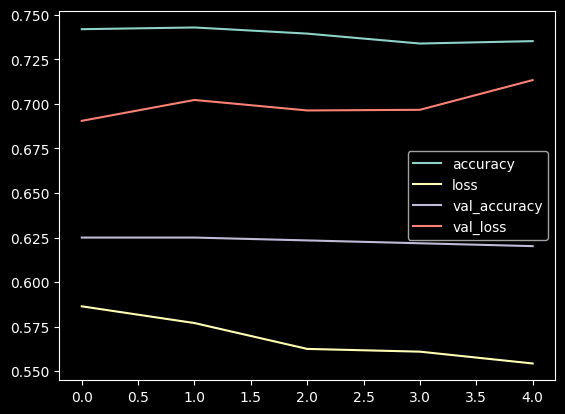

In [113]:

if os.path.exists(MODEL_PATH) and os.path.exists(HISTORY_PATH):
    print("Loading Already Present Model")
    model = tf.keras.models.load_model(MODEL_PATH)
    history = joblib.load(HISTORY_PATH)
    #evaulation
    pd.DataFrame(history).plot()

else:
    print("Making a new Model")

    history = model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data)
    model.save(MODEL_PATH)
    #savng history
    joblib.dump(history.history, HISTORY_PATH)

    #evaluation
    pd.DataFrame(history.history).plot()